In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
#Download pandas json : https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json
df=pd.read_json("https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json")

In [3]:
#View the result of the loaded model data.
df

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029
...,...,...,...,...,...,...,...,...,...,...,...,...
1342,Master Bedroom,4,4,1.739907,4.703960,0.166677,0.487452,1.074033,0.166677,2.992362,4.703960,1.216172
1343,Master Bedroom 2,4,4,0.530908,0.786997,0.101973,0.323746,0.614770,0.101973,0.738071,0.786997,0.670290
1344,Zimmer I,4,4,0.880569,1.221873,0.362600,0.823587,1.120810,0.362600,0.937550,1.221873,0.490739
1345,Hallway Bathroom,6,6,24.923452,64.266820,0.064699,24.857904,64.123596,0.064699,24.988999,64.266820,0.074356


In [ ]:
#Meaningful statistics of how well the model performed.
#First 5 rows
df.head()


In [13]:
#Last 5 rows 
df.tail()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
1342,Master Bedroom,4,4,1.739907,4.703960,0.166677,0.487452,1.074033,0.166677,2.992362,4.703960,1.216172
1343,Master Bedroom 2,4,4,0.530908,0.786997,0.101973,0.323746,0.614770,0.101973,0.738071,0.786997,0.670290
1344,Zimmer I,4,4,0.880569,1.221873,0.362600,0.823587,1.120810,0.362600,0.937550,1.221873,0.490739
1345,Hallway Bathroom,6,6,24.923452,64.266820,0.064699,24.857904,64.123596,0.064699,24.988999,64.266820,0.074356
1346,Bedroom 4,4,4,0.387328,0.762659,0.166426,0.349720,0.730373,0.205136,0.424936,0.762659,0.166426


In [17]:
#Let's look at the size of this dataframe
df.shape


(1347, 12)

In [53]:
#Number of columns.
df.shape[1]

12

In [54]:
#Number of rows.
df.shape[0]

1347

In [20]:
#Let's check if there are missing values in the cells.
df.info()
#We have 12 columns with 1347 rows

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB


In [ ]:
#Each of the 12 columns is filled with 1347 non-zero values.


In [22]:
#Let's set how many zero values there are in each column.
df.isna().sum()

name            0
gt_corners      0
rb_corners      0
mean            0
max             0
min             0
floor_mean      0
floor_max       0
floor_min       0
ceiling_mean    0
ceiling_max     0
ceiling_min     0
dtype: int64

In [ ]:
#Result: there are no null values for each column.


In [48]:
#General standard characteristics for numeric columns.
df.describe()


,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,4.307350,4.307350,12.895320,25.448011,2.920388,11.022443,20.405499,3.146246,14.768198,24.848020,5.521437
std,0.814412,0.814412,21.839948,42.758159,9.258972,19.136320,33.189081,9.559611,26.047057,42.345579,14.460565
min,4.000000,4.000000,0.192973,0.323886,0.007456,0.134686,0.178059,0.007456,0.123169,0.220846,0.009268
25%,4.000000,4.000000,0.658488,1.243804,0.147432,0.514150,0.888043,0.164668,0.742915,1.180960,0.306071
50%,4.000000,4.000000,2.123456,4.703514,0.279876,1.932503,4.008014,0.304374,2.159995,3.777277,0.600597
75%,4.000000,4.000000,14.810982,28.312051,0.674444,13.430288,24.986504,0.801416,15.150233,27.551533,1.840563
max,10.000000,10.000000,121.301055,179.165483,81.764483,121.244083,177.961811,81.791505,157.387474,179.165483,144.472533


In [49]:
#General standard characteristics for columns with data type='object' .
df.describe(include=['O'])

,name
count,1347
unique,588
top,Master Bedroom
freq,42


In [60]:
#Is there any duplicate data?
df.duplicated().sum()

0

In [58]:
#We get the number of unique values for each column.
df.nunique()

name             588
gt_corners         4
rb_corners         4
mean            1347
max             1347
min             1347
floor_mean      1347
floor_max       1347
floor_min       1347
ceiling_mean    1347
ceiling_max     1347
ceiling_min     1347
dtype: int64

In [ ]:
#It turns out that we made 1347 measurements for 588 types of rooms, among which there are 4 types of varieties of the number of angles in the room identified by both the model and their true values.

In [ ]:
#Let us determine how many times each of the true angle values is repeated in measurements.(1 variant)

In [62]:
df['gt_corners'].value_counts()

gt_corners
4     1163
6      162
8       21
10       1
Name: count, dtype: int64

In [66]:
#Let us determine how many times each of the true angle values is repeated in measurements.(2 variant)
df.groupby('gt_corners').agg({'gt_corners':"count"})

,gt_corners
gt_corners,
4,1163
6,162
8,21
10,1


In [67]:
#The maximum true value of the corners of the room.
df['gt_corners'].max()

10

In [68]:
#Minimum true value of room corners.
df['gt_corners'].min()

4

In [78]:
#Room with 10 corners.
df[df['gt_corners']==10]

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
739,Master Bathroom,10,10,13.202775,53.145464,0.195567,13.67592,53.145464,0.262791,12.72963,49.7854,0.195567


In [87]:
#Room with 10 corners.
df.query("`gt_corners`==10")

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
739,Master Bathroom,10,10,13.202775,53.145464,0.195567,13.67592,53.145464,0.262791,12.72963,49.7854,0.195567


In [4]:
#Let's compare the values main statistical parameters of the true number of corners (column 'gt_corner') in the room and the number of corners in the room detected by the model (column 'rb_corner').
comparison=df[['gt_corners','rb_corners']].describe()
comparison

,gt_corners,rb_corners
count,1347.000000,1347.000000
mean,4.307350,4.307350
std,0.814412,0.814412
min,4.000000,4.000000
25%,4.000000,4.000000
50%,4.000000,4.000000
75%,4.000000,4.000000
max,10.000000,10.000000


In [ ]:
#The values of the main statistical parameters are the same.

In [ ]:
#Create matplotlib figure with two axes in 1x2 grid

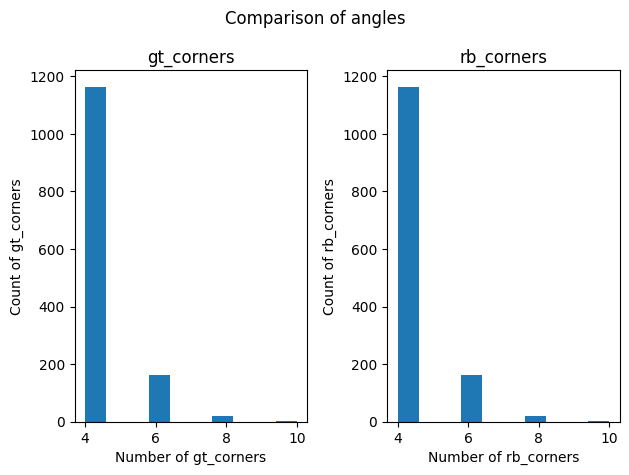

In [67]:
fig=plt.figure() #create the entire figure
axes1=fig.add_subplot(1,2,1) #subplot in 1 row and 2 column, plot location 1,plot of df['gt_corners']
axes2=fig.add_subplot(1,2,2) #subplot in 1 row and 2 column, plot location 2,plot of df['rb_corners']

fig.set_tight_layout(True)
axes1.hist(data=df,x='gt_corners')
axes2.hist(data=df,x='rb_corners')

           
fig.suptitle("Comparison of angles")       
axes1.set_title("gt_corners") #small title to 1 subplot
axes1.set_xlabel('Number of gt_corners')
axes1.set_ylabel('Count of gt_corners')
axes2.set_xlabel('Number of rb_corners')
axes2.set_ylabel('Count of rb_corners')
axes2.set_title("rb_corners") #small title to 2 subplot
plt.show()           

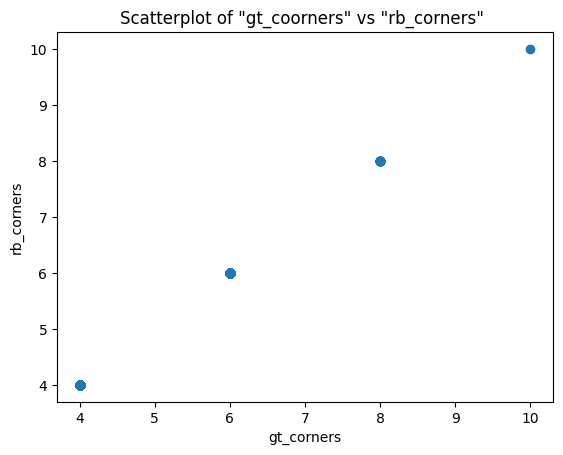

In [71]:
 #
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(data=df,x='gt_corners',y='rb_corners')
axes1.set_title('Scatterplot of "gt_coorners" vs "rb_corners" ')
axes1.set_xlabel('gt_corners')
axes1.set_ylabel('rb_corners')
plt.show()


In [ ]:
#Using the histogram and scatterplot, we see that the column with real data and the column with data obtained by the model are exactly the same. Our model works with complete accuracy.

<Axes: xlabel='max', ylabel='min'>

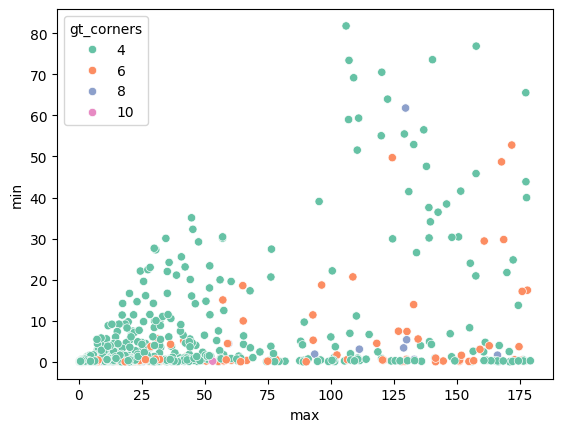

In [8]:
#A scatterplot shows the relationship between 'max' and 'min'  deviations of room corners distributed by color according to the number of corners in the room by using points .
sns.scatterplot(data=df,x=df['max'],y=df['min'],hue='gt_corners',palette='Set2')


<Axes: xlabel='max', ylabel='min'>

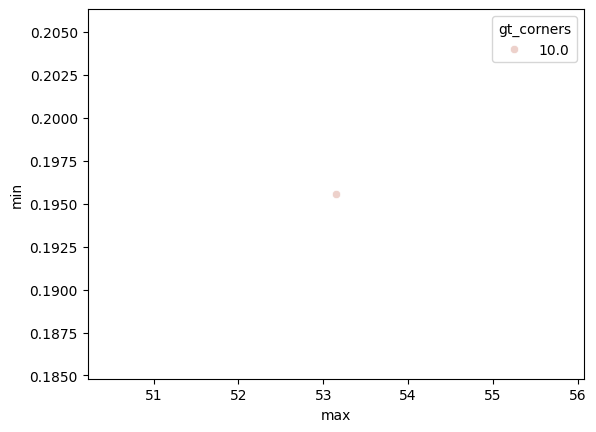

In [33]:
sns.scatterplot(data=df[df['gt_corners']==10],x=df['max'],y=df['min'],hue='gt_corners')

<Axes: xlabel='max', ylabel='min'>

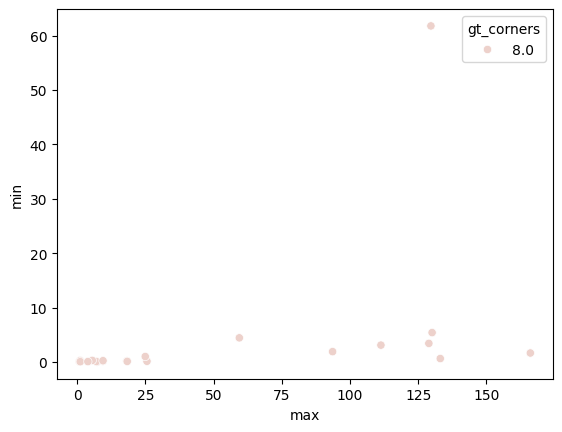

In [34]:
sns.scatterplot(data=df[df['gt_corners']==8],x=df['max'],y=df['min'],hue='gt_corners')

<Axes: xlabel='max', ylabel='min'>

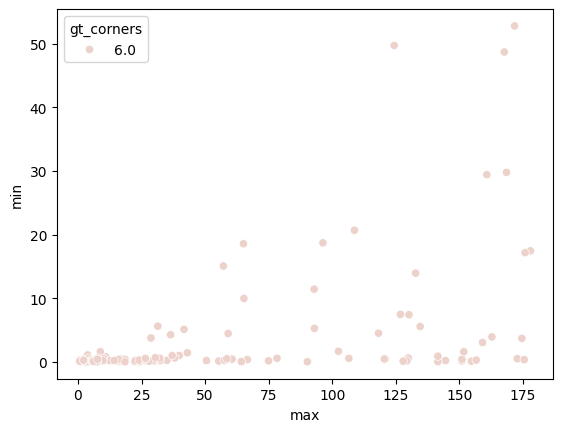

In [28]:
sns.scatterplot(data=df[df['gt_corners']==6],x=df['max'],y=df['min'],hue='gt_corners')

<Axes: xlabel='max', ylabel='min'>

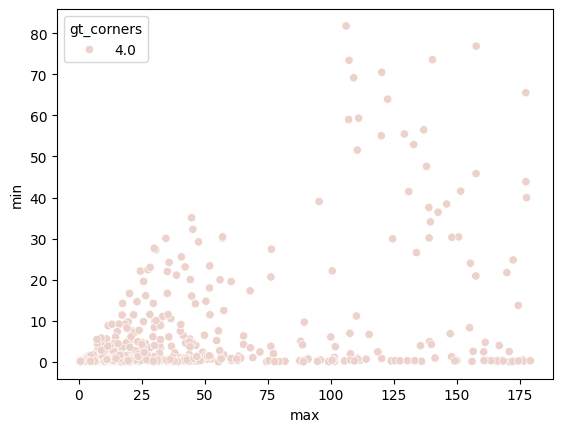

In [29]:
sns.scatterplot(data=df[df['gt_corners']==4],x=df['max'],y=df['min'],hue='gt_corners')

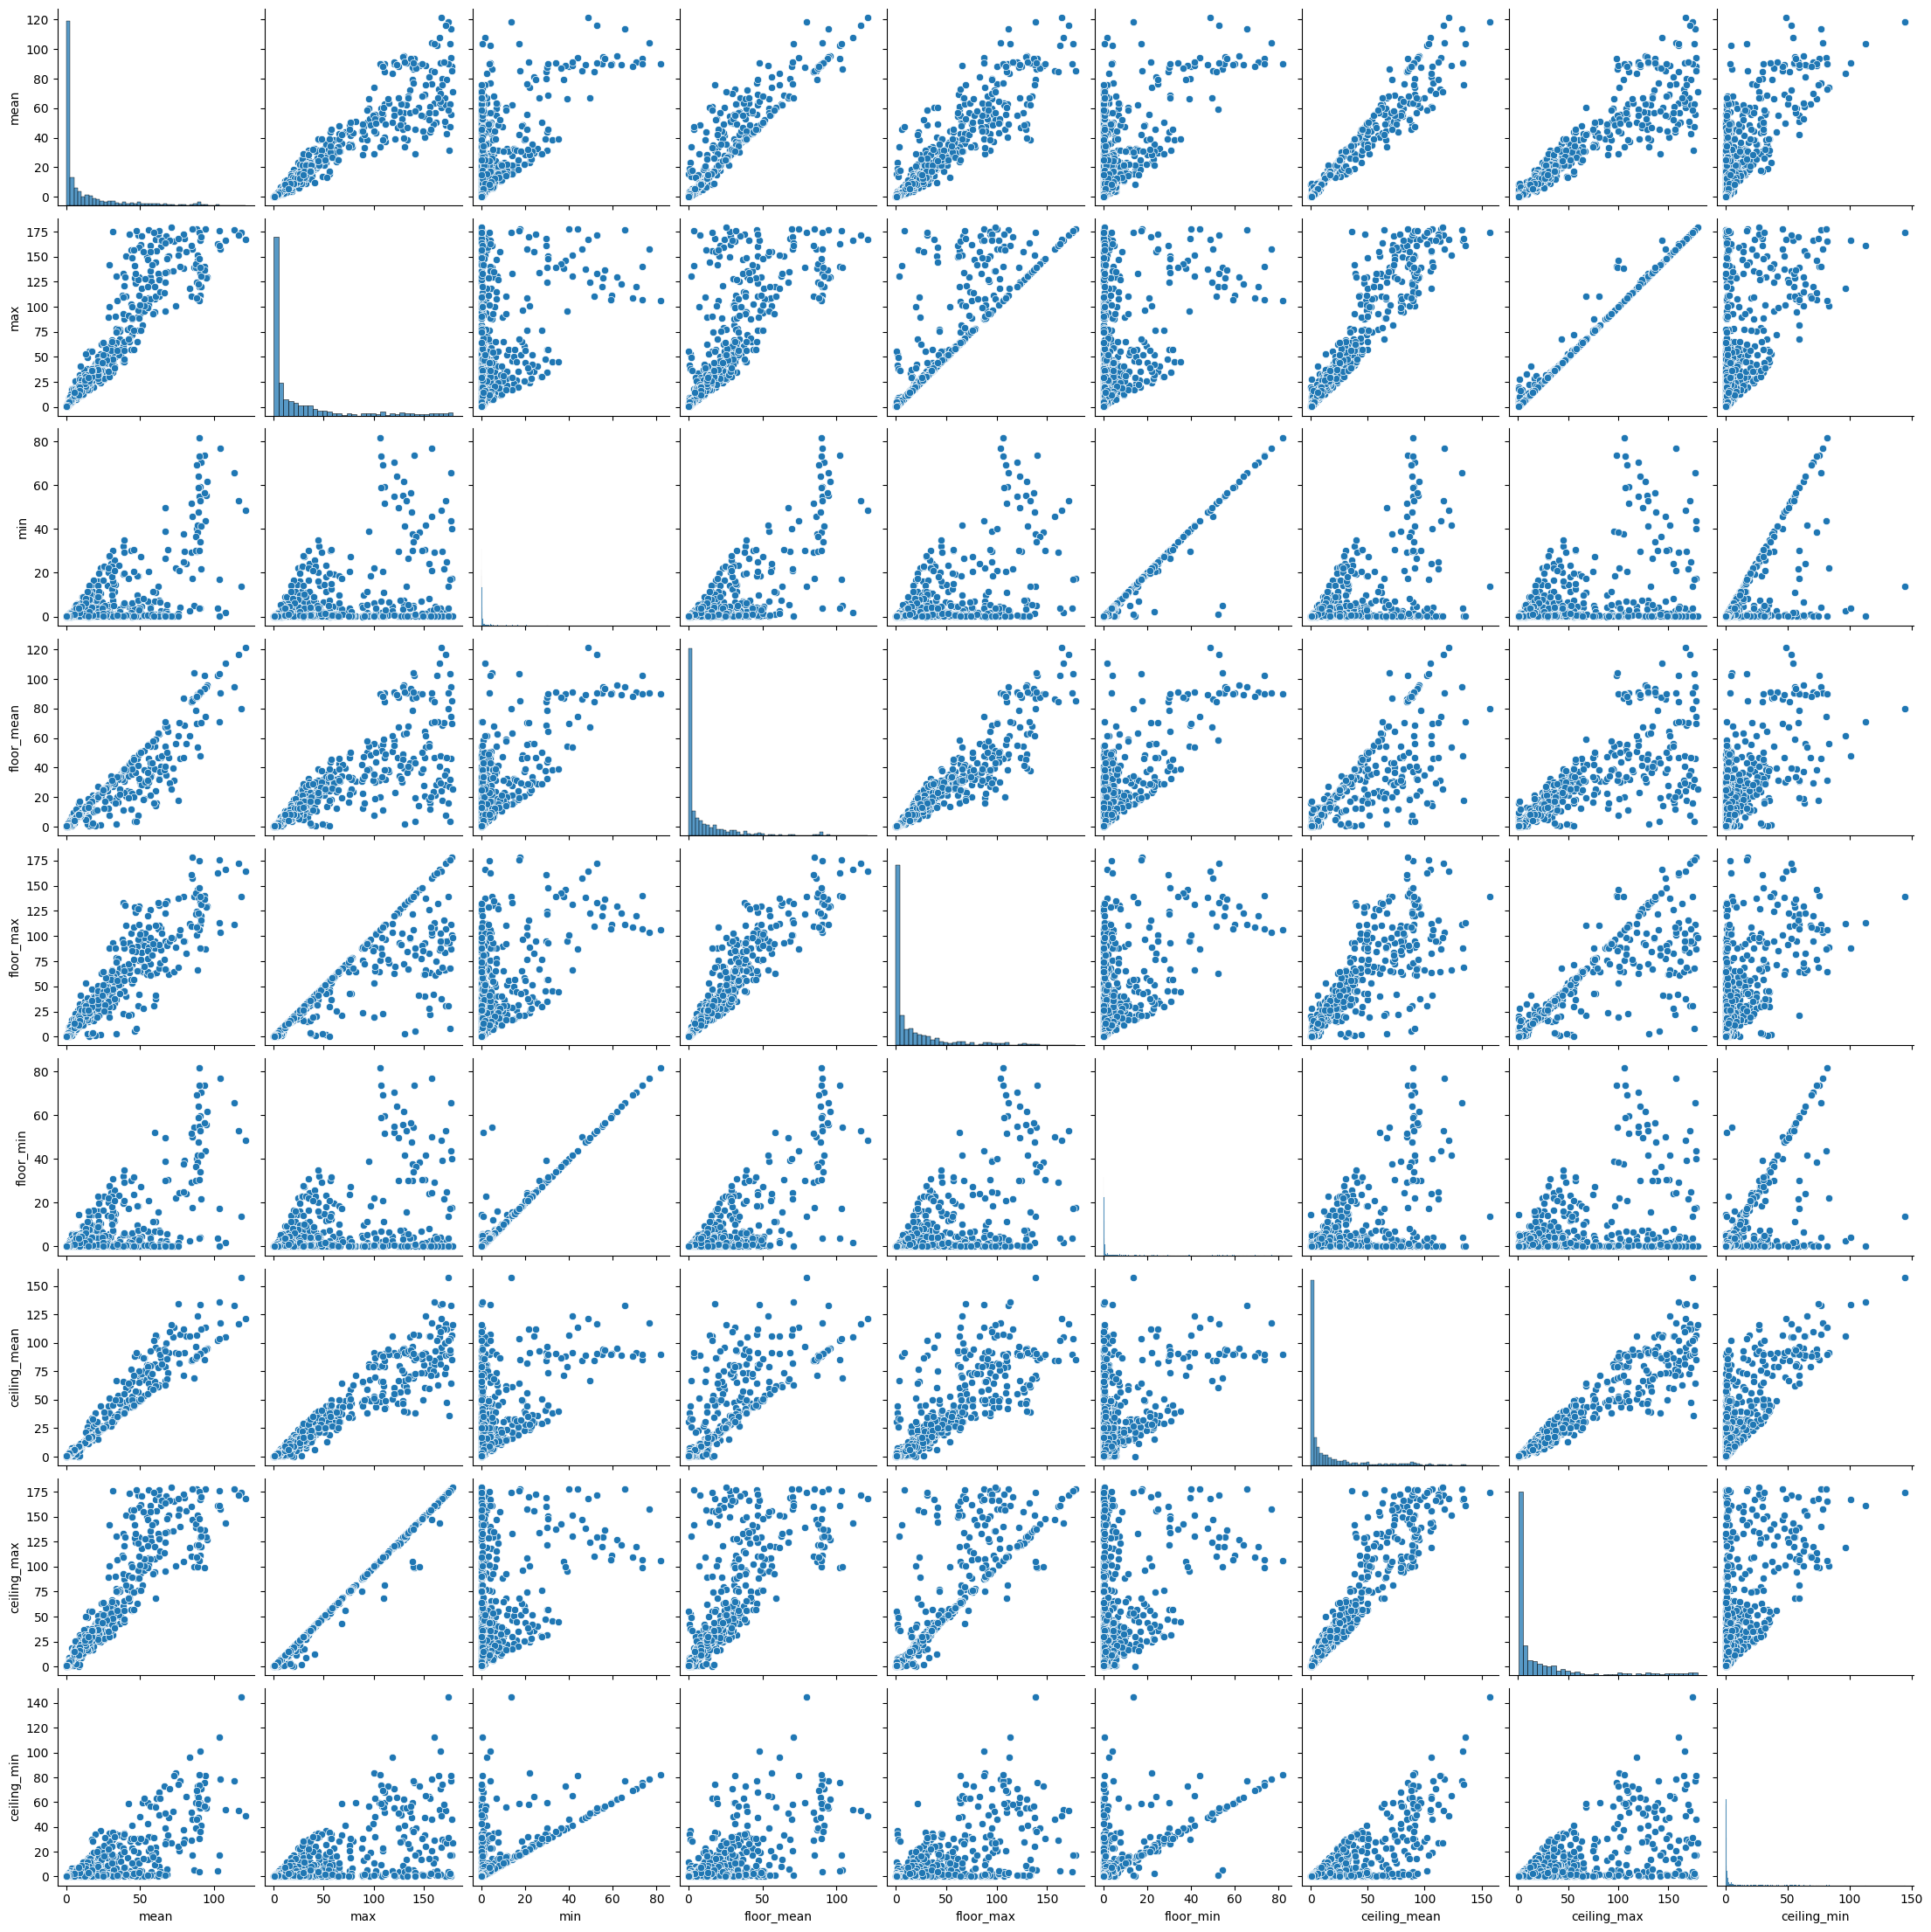

In [5]:
sns.pairplot(data=df[df.columns[3:]])


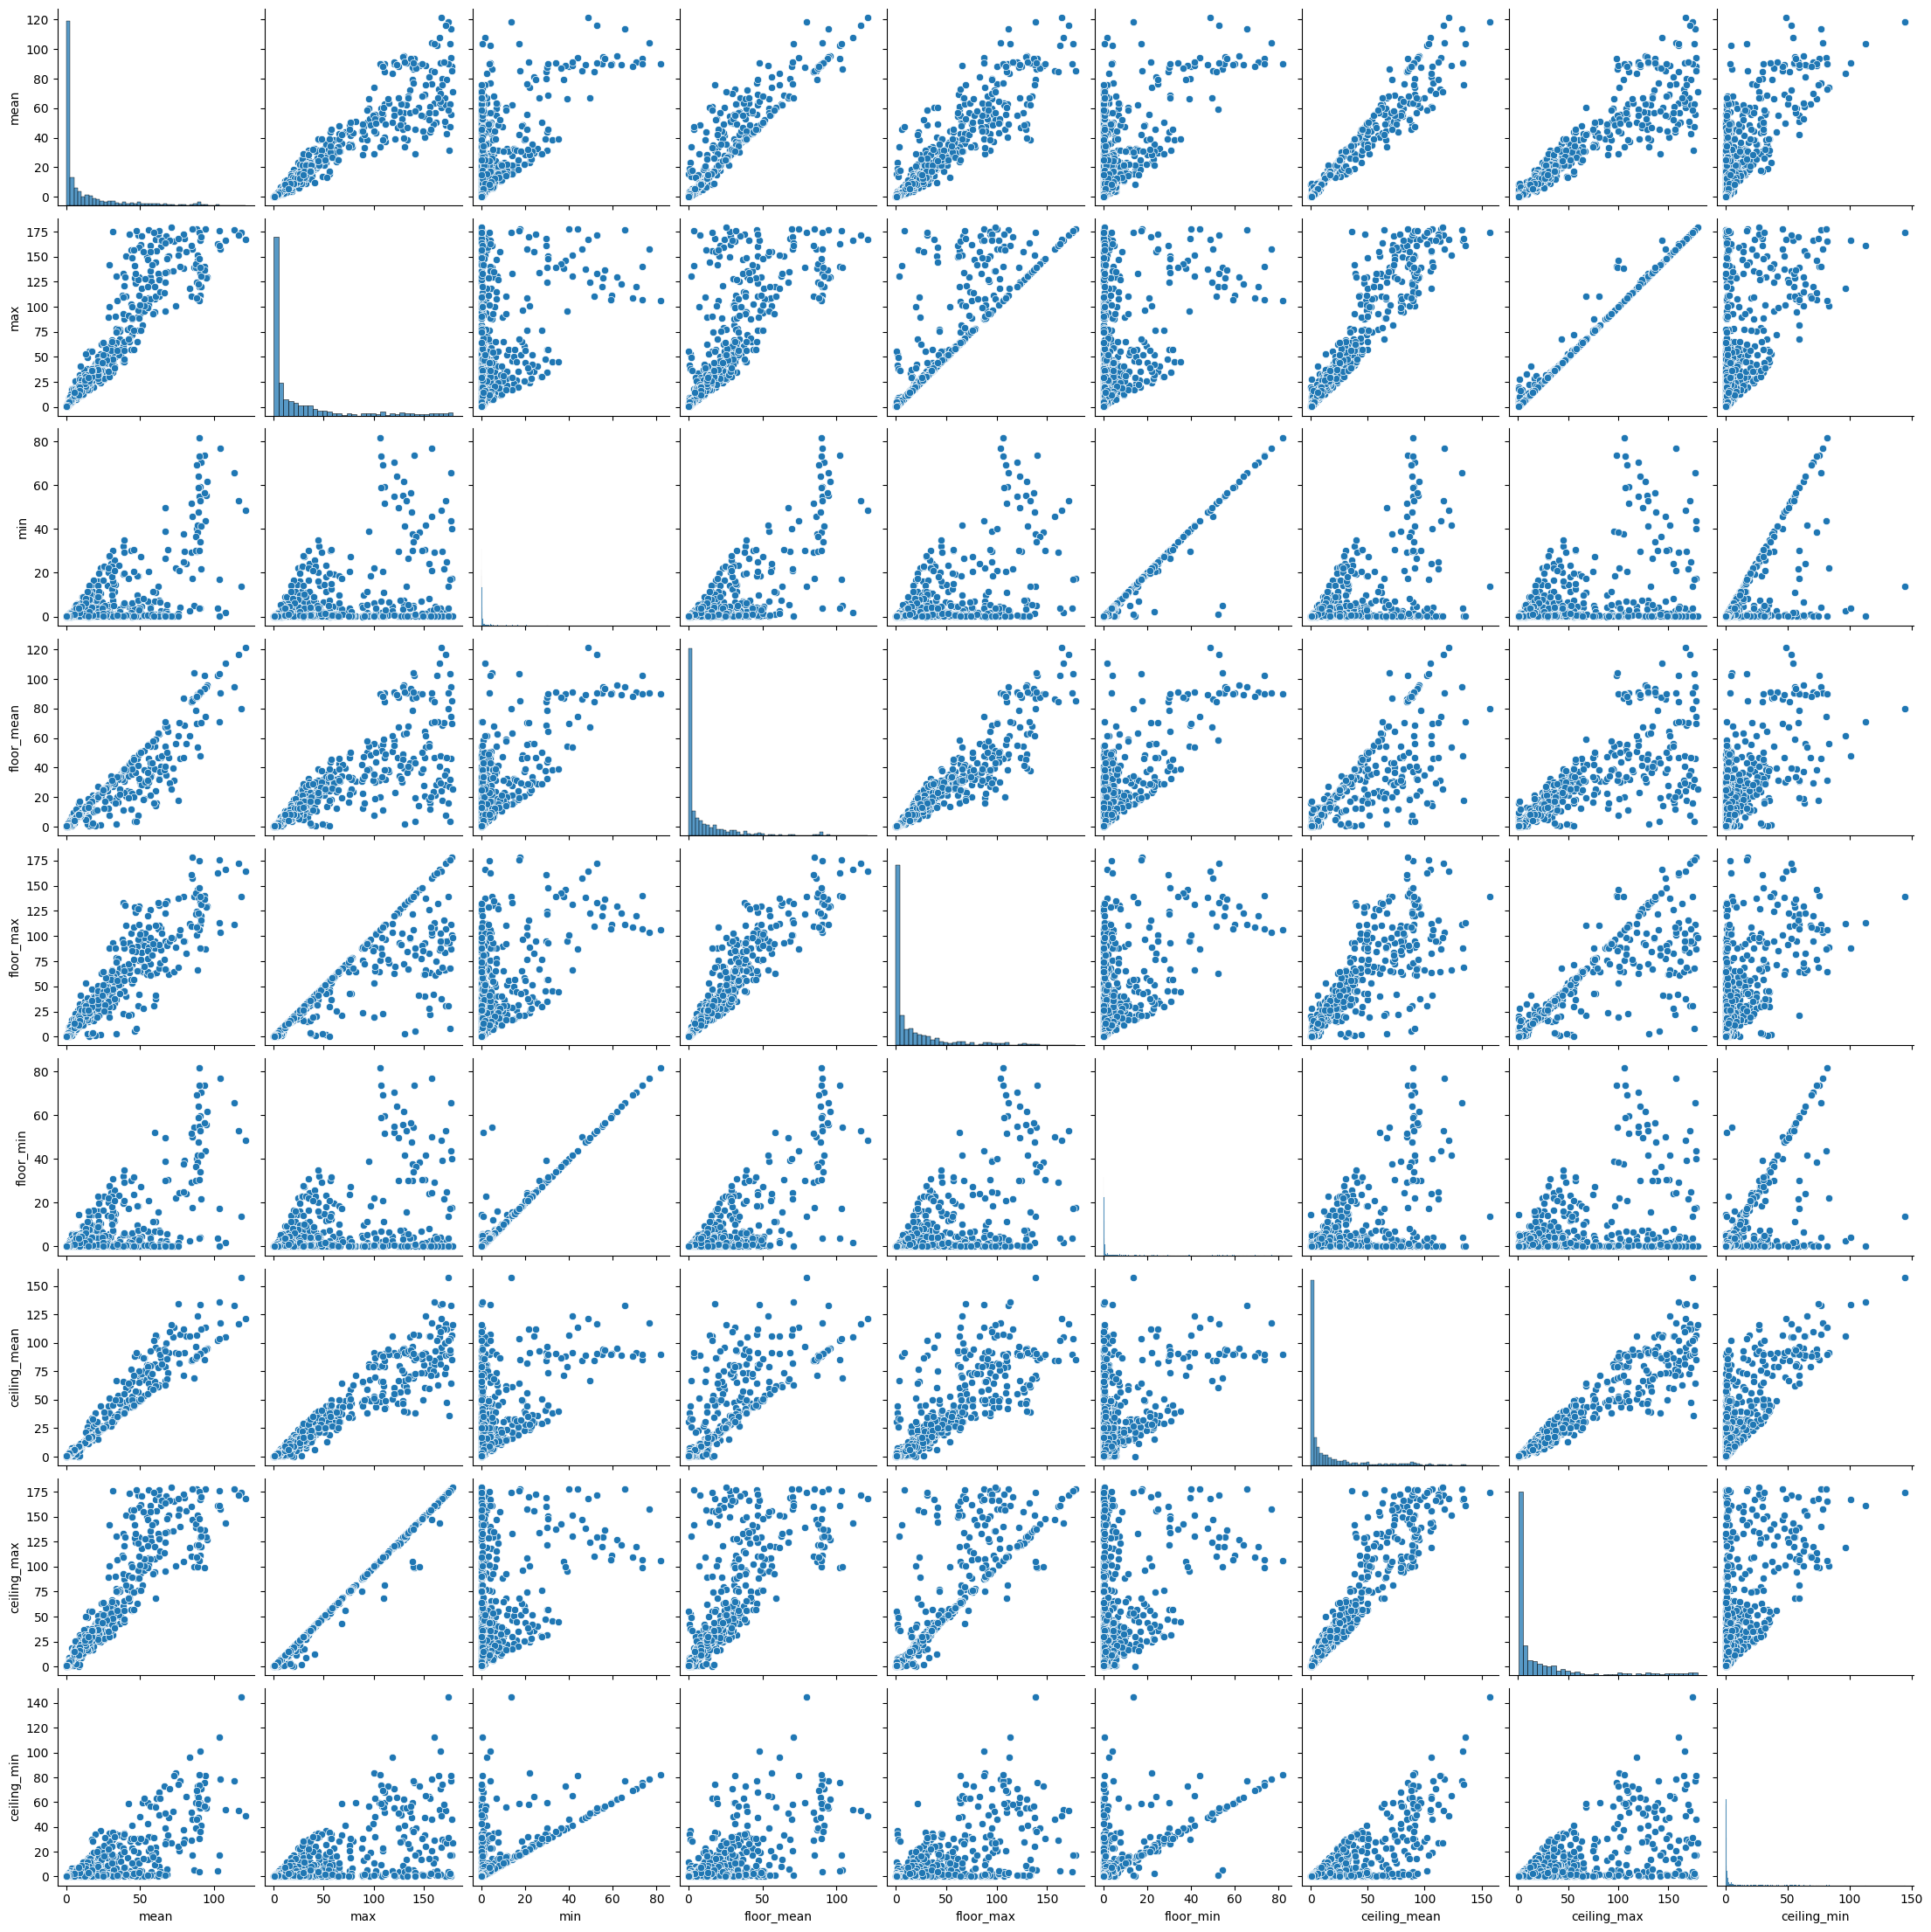

In [9]:
sns.pairplot(data=df.iloc[:,3:])